In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import math

![alt text](plate_hole.png "Delaunay Mesh")

In [41]:
L = 0.1
h = 0.05
r = 0.02

nb_element = 20

#1-1 Create Nodes
#Nodes = np.array([[0,0],[0,1],[1,0],[1,1]])

Nodes = []

for x in np.linspace(0, L, num=nb_element):
    if(x<r):
        y0 = math.sqrt(r**2-x**2)
        for y in np.linspace(y0, h, num=nb_element):
            Nodes.append([x,y])
            
    else:
        for y in np.linspace(0, h, num=nb_element):
            Nodes.append([x,y])

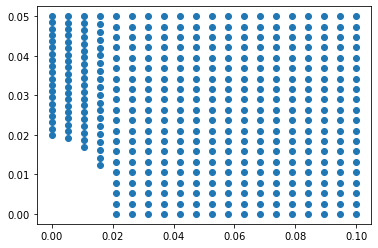

In [42]:
#1-2 Display Nodes

points = np.array(Nodes)

plt.plot(points[:,0],points[:,1],'o')
plt.show()

In [43]:
#2- Create Elements
from scipy.spatial import Delaunay
tri = Delaunay(points)

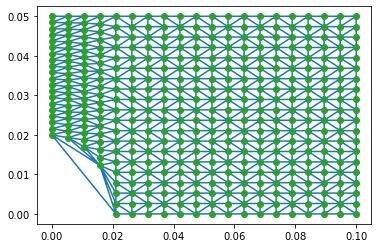

In [44]:
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o') 
plt.show(figure)

In [45]:
tri.simplices

array([[ 80,  60,   0],
       [ 30,  31,  10],
       [ 51,  30,  50],
       ...,
       [108,  89,  88],
       [107, 108,  87],
       [ 87, 108,  88]], dtype=int32)

In [61]:
#Create a set of points on a circle of diameter 0.0195 
p = []
r2=0.0195
for x in np.linspace(0,r2,10):
    p.append([x,math.sqrt(r2**2-x**2)])

print(p)
#Find the elements which contain those points
tri.find_simplex(p)

[[0.0, 0.0195], [0.0021666666666666666, 0.019379255804998177], [0.004333333333333333, 0.019012422839349598], [0.0065, 0.018384776310850236], [0.008666666666666666, 0.017468225121313522], [0.010833333333333334, 0.016213848676020413], [0.013, 0.014534441853748633], [0.015166666666666665, 0.012256517540566825], [0.017333333333333333, 0.008933395522171598], [0.0195, 0.0]]


array([ -1, 154, 154, 154, 153, 153, 153,   0,  21,  -1], dtype=int32)

In [58]:
#Create a new set of elements without the problematic elements
mesh = np.delete(tri.simplices,[0,154,33,23],0)

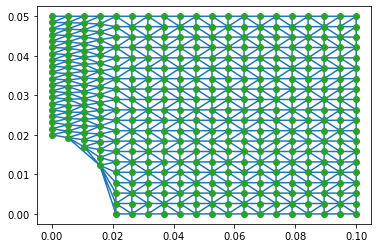

In [59]:
plt.triplot(points[:,0], points[:,1], mesh)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [14]:
#3- Export into a file
nb_nodes = len(points)
nb_elements = len(mesh)

file = open("plate_mesh.dat","w")
file.write("{} {}\n".format(nb_nodes,nb_elements))
for i,node in enumerate(Nodes):
    file.write("{} {} {}\n".format(i,node[0],node[1])) 
for j,elem in enumerate(mesh):
    file.write("{} {} {} {}\n".format(j,elem[0],elem[1],elem[2]))
file.close()

In [15]:
nb_nodes = len(points)
nb_elements = len(mesh)

for j,elem in enumerate(mesh):
    print("{} {} {} {}\n".format(j,elem[0],elem[1],elem[2]))

0 8 22 23

1 7 6 21

2 22 7 21

3 7 22 8

4 9 8 23

5 35 36 21

6 36 35 51

7 20 35 21

8 5 20 6

9 6 20 21

10 18 17 33

11 34 18 33

12 18 4 3

13 17 18 3

14 43 28 42

15 42 28 0

16 28 14 0

17 2 17 3

18 2 16 17

19 19 18 34

20 20 19 35

21 19 20 5

22 19 5 4

23 18 19 4

24 26 12 11

25 41 26 40

26 15 31 16

27 14 15 0

28 28 45 46

29 30 15 14

30 15 30 31

31 2 1 16

32 15 1 0

33 1 15 16

34 22 37 23

35 37 38 23

36 37 22 36

37 38 24 23

38 9 24 10

39 24 9 23

40 12 27 13

41 26 27 12

42 27 26 41

43 47 30 46

44 30 47 31

45 44 28 43

46 44 45 28

47 28 29 14

48 29 30 14

49 29 28 46

50 30 29 46

51 37 52 38

52 52 36 51

53 52 37 36

54 55 41 40

55 54 55 40

56 39 24 38

57 39 54 40

58 47 48 31

59 52 53 38

60 53 39 38

61 39 53 54

62 26 25 40

63 25 39 40

64 39 25 24

65 25 26 11

66 25 11 10

67 24 25 10

68 48 32 31

69 31 32 16

70 17 32 33

71 16 32 17

72 49 34 33

73 32 49 33

74 49 32 48

75 49 50 34

76 35 50 51

77 50 35 34

78 56 43 42

79 43 56 57

8

In [ ]:
8 => 05 21 ==> 05 20   456  485
9 => 06 20 ==> 06 21   785  756
